In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#importing the dataset
train_dataset=pd.read_csv('Apple_Train.csv')
test_dataset=pd.read_csv('Apple_Test.csv')

In [4]:
#checking the head of our head
train_dataset.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/2/2003,1.025714,1.065714,1.025000,1.057143,0.707929,45357200
1,1/3/2003,1.057143,1.066429,1.042143,1.064286,0.712713,36863400
2,1/6/2003,1.073571,1.098571,1.062857,1.064286,0.712713,97633200
3,1/7/2003,1.056429,1.071429,1.033571,1.060714,0.710321,85586200
4,1/8/2003,1.041429,1.050714,1.031429,1.039286,0.695971,57411200


In [5]:
test_dataset.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/2/2018,170.160004,172.300003,169.259995,172.259995,169.712067,25555900
1,1/3/2018,172.529999,174.550003,171.960007,172.229996,169.682510,29517900
2,1/4/2018,172.539993,173.470001,172.080002,173.029999,170.470703,22434600
3,1/5/2018,173.440002,175.369995,173.050003,175.000000,172.411560,23660000
4,1/8/2018,174.350006,175.610001,173.929993,174.350006,171.771179,20567800


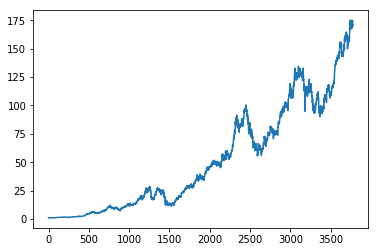

In [6]:
#visualisng the input data
plt.plot(train_dataset['Open'])

In [7]:
import seaborn as sns

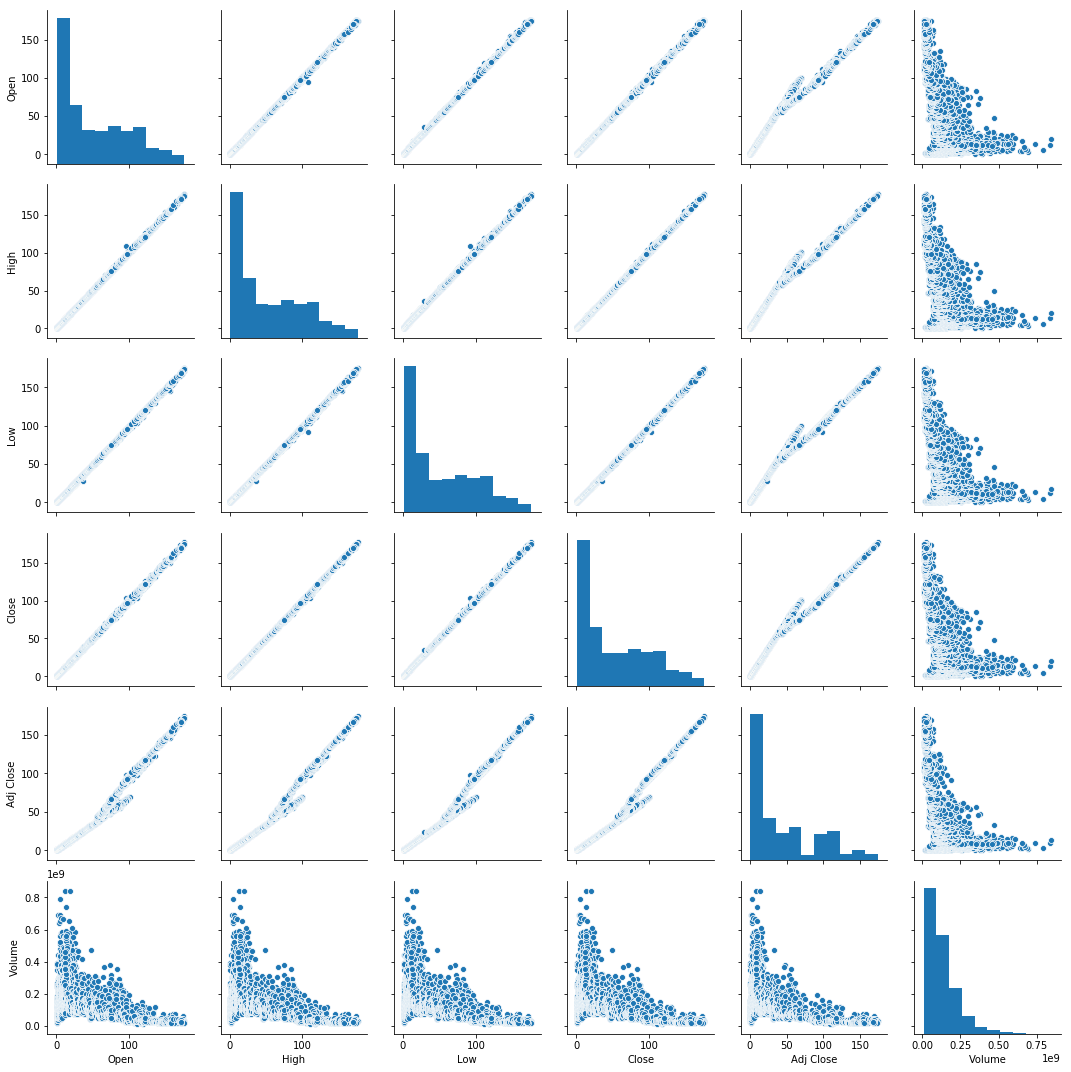

In [8]:
sns.pairplot(train_dataset)

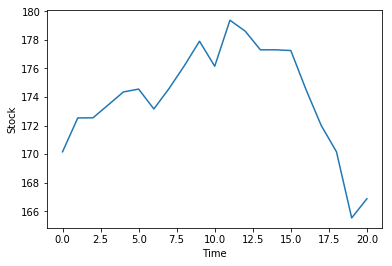

In [9]:
plt.plot(test_dataset['Open'])
plt.xlabel('Time')
plt.ylabel('Stock');

In [10]:
#Now The RNN model doesnot acceept dataframe as its input
#so we have to convert the dataframe into the numpy arrary
train_data=train_dataset.iloc[:,1:3].values

In [11]:
train_data.shape

(3776, 2)

In [13]:
#feature Scaling
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler()

In [15]:
scaled_data=Scaler.fit_transform(train_data)

In [143]:
#Deciding on the number of time step
#we are taking timestep as 80
#i.e the Model will save the data of previous 80 days to make future Predictions
#Creating A data Structure that will consisit 80 days data for every single date
X_train=[]
y_train=[]

for i in range(80,len(scaled_data)):
    X_train.append(scaled_data[i-80:i,:])
    y_train.append(scaled_data[i,0])



In [19]:
#converting the obtained datastucture into numpy array
X_train=np.array(X_train)
y_train=np.array(y_train)

In [21]:
print(type(X_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [34]:
#RNN expects a 3d array as its output
X_train.shape


(3696, 80, 2)

In [37]:
#importing the libraries required for building the layers of our RNN
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
#Dense for the output layer 
#Dropout to prevent the model from overfitting

In [38]:
#initialising the model
model=Sequential()

In [45]:
#buliding the first layer of our LSTM
model.add(LSTM(units=60,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(Dropout(0.2))

In [46]:
#Second Layer
model.add(LSTM(units=60,return_sequences=True))
model.add(Dropout(0.2))

In [47]:
#third layer
model.add(LSTM(units=60,return_sequences=True))
model.add(Dropout(0.2))

In [48]:
#fouth layer
model.add(LSTM(units=60,return_sequences=True))
model.add(Dropout(0.2))

In [49]:
#final layer
model.add(LSTM(units=60,return_sequences=False))
model.add(Dropout(0.2))

In [50]:
#Output layer
model.add(Dense(units=1))

In [51]:
#Compiling the Model
model.compile(optimizer='adam',loss='mean_squared_error')

In [52]:
#fitting our model to our dataset to train the model
model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
3696/3696 [==============================] - 39s 11ms/step - loss: 0.0101
Epoch 2/100
3696/3696 [==============================] - 40s 11ms/step - loss: 0.0022
Epoch 3/100
3696/3696 [==============================] - 38s 10ms/step - loss: 0.0021
Epoch 4/100
3696/3696 [==============================] - 35s 9ms/step - loss: 0.0018
Epoch 5/100
3696/3696 [==============================] - 36s 10ms/step - loss: 0.0015
Epoch 6/100
3696/3696 [==============================] - 34s 9ms/step - loss: 0.0015
Epoch 7/100
3696/3696 [==============================] - 34s 9ms/step - loss: 0.0013
Epoch 8/100
3696/3696 [==============================] - 34s 9ms/step - loss: 0.0013
Epoch 9/100
3696/3696 [==============================] - 34s 9ms/step - loss: 0.0016
Epoch 10/100
3696/3696 [==============================] - 36s 10ms/step - loss: 0.0014
Epoch 11/100
3696/3696 [==============================] - 37s 10ms/step - loss: 0.0012
Epoch 12/100
3696/3696 [==============================] -

3696/3696 [==============================] - 35s 10ms/step - loss: 5.4080e-04
Epoch 93/100
3696/3696 [==============================] - 36s 10ms/step - loss: 5.4067e-04
Epoch 94/100
3696/3696 [==============================] - 35s 9ms/step - loss: 5.9593e-04
Epoch 95/100
3696/3696 [==============================] - 37s 10ms/step - loss: 5.4475e-04
Epoch 96/100
3696/3696 [==============================] - 32s 9ms/step - loss: 5.9647e-04
Epoch 97/100
3696/3696 [==============================] - 37s 10ms/step - loss: 5.8677e-04
Epoch 98/100
3696/3696 [==============================] - 42s 11ms/step - loss: 5.9176e-04
Epoch 99/100
3696/3696 [==============================] - 35s 9ms/step - loss: 4.9940e-04
Epoch 100/100
3696/3696 [==============================] - 42s 11ms/step - loss: 4.8645e-04


In [128]:
#Now Creating another structure in order to make preodiction
test_data=test_dataset.iloc[:,1:2].values
final_dataset=pd.concat((train_dataset[['Open','Close']],test_dataset[['Open','Close']]),axis=0)

In [129]:
input_data=final_dataset[len(final_dataset)-len(test_dataset)-80:].values

In [130]:
input_data.reshape(-1,1)

input_data=Scaler.transform(input_data)
X_test=[]
for i in range(80,100):
    X_test.append(input_data[i-80:i,0:2])
    
X_test=np.array(X_test)


In [131]:
#Making Predictions 
predictions=model.predict(X_test)

In [157]:
# Get something which has as many features as dataset
trainPredict_extended = np.zeros((len(predictions),2))
# Put the predictions there
trainPredict_extended[:,1] = predictions.transpose()

In [158]:
trainPredict_extended

array([[0.        , 0.97287846],
       [0.        , 0.97111022],
       [0.        , 0.96997106],
       [0.        , 0.96891677],
       [0.        , 0.96850896],
       [0.        , 0.9685235 ],
       [0.        , 0.96857262],
       [0.        , 0.96867323],
       [0.        , 0.96915948],
       [0.        , 0.97070467],
       [0.        , 0.97267687],
       [0.        , 0.97487903],
       [0.        , 0.97761309],
       [0.        , 0.98014235],
       [0.        , 0.98192656],
       [0.        , 0.98335564],
       [0.        , 0.98428571],
       [0.        , 0.98394394],
       [0.        , 0.98268294],
       [0.        , 0.98037755]])

In [159]:
# Inverse transform it and select the 2nd column.
trainPredict = Scaler.inverse_transform(trainPredict_extended)[:,1]

In [160]:
trainPredict

array([172.41961188, 172.10794721, 171.90716061, 171.72133425,
       171.64945366, 171.65201707, 171.66067384, 171.67840761,
       171.76411382, 172.03646583, 172.38408131, 172.77222811,
       173.25412854, 173.6999311 , 174.01441132, 174.26629807,
       174.43023036, 174.36999018, 174.14772976, 173.74138694])

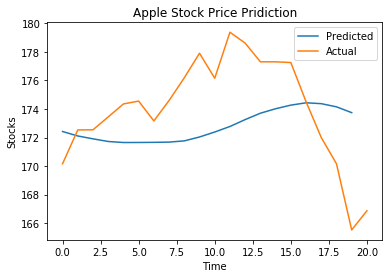

In [162]:
plt.plot(trainPredict,label='Predicted')
plt.plot(test_data,label='Actual')
plt.title('Apple Stock Price Pridiction')
plt.xlabel('Time')
plt.ylabel('Stocks')
plt.legend()

## Our Model Can Be Futher Improved By Parameter Tunning 
i.e By

1.Increasing the number of Time Steps

2.Increasing the number of neuron in a RNN layer

3.Increasing the nuumber of layer in our model

